# Practical Statistics for Data Scientists (R)
# Chapter 2. Data and Sampling Distributions
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Import required R packages.

In [1]:
library(boot)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [2]:
PSDS_PATH <- file.path(dirname(dirname(getwd())))

loans_income <- read.csv(file.path(PSDS_PATH, 'data', 'loans_income.csv'))[,1]
sp500_px <- read.csv(file.path(PSDS_PATH, 'data', 'sp500_data.csv.gz'), row.names=1)

Figure 2.1

null device 
          1

null device 
          1

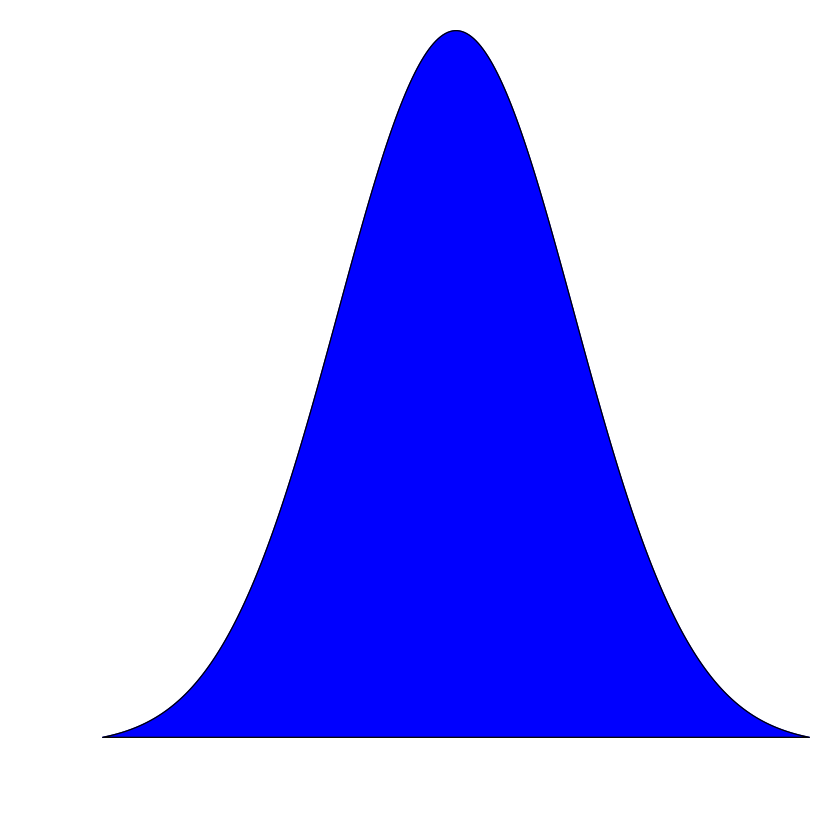

In [3]:
x <- seq(from=-3, to=3, length=300)
gauss <- dnorm(x)

    par(mar=c(3, 3, 0, 0)+.1)
    plot(x, gauss, type='l', col='blue', xlab='', ylab='', axes=FALSE)
    polygon(x, gauss, col='blue')
dev.off()

    norm_samp <- rnorm(100)
    par(mar=c(3, 3, 0, 0)+.1)
    hist(norm_samp, axes=FALSE, col='red', main='')
dev.off()

# Sampling Distribution of a Statistic

In [4]:
# take a simple random sample
samp_data <- data.frame(income=sample(loans_income, 1000), 
                        type='data_dist')

# take a sample of means of 5 values
samp_mean_05 <- data.frame(
  income = tapply(sample(loans_income, 1000*5), 
                  rep(1:1000, rep(5, 1000)), FUN=mean),
  type = 'mean_of_5')

# take a sample of means of 20 values
samp_mean_20 <- data.frame(
  income = tapply(sample(loans_income, 1000*20), 
                  rep(1:1000, rep(20, 1000)), FUN=mean),
  type = 'mean_of_20')

# bind the data.frames and convert type to a factor
income <- rbind(samp_data, samp_mean_05, samp_mean_20)
income$type <- factor(income$type, 
                     levels=c('data_dist', 'mean_of_5', 'mean_of_20'),
                     labels=c('Data', 'Mean of 5', 'Mean of 20'))

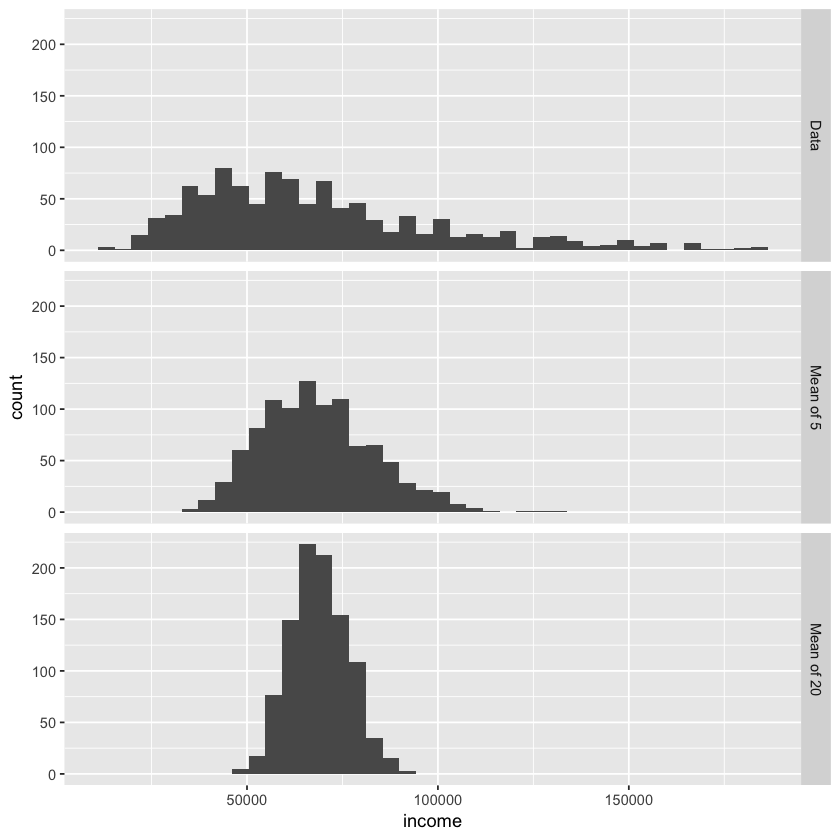

In [5]:
ggplot(income, aes(x=income)) +
  geom_histogram(bins=40) +
  facet_grid(type ~ .)

# The Bootstrap
As the calculation uses random samples, results will vary between runs

In [6]:
stat_fun <- function(x, idx) median(x[idx])
boot_obj <- boot(loans_income, R=1000, statistic=stat_fun)

boot_obj


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = loans_income, statistic = stat_fun, R = 1000)


Bootstrap Statistics :
    original   bias    std. error
t1*    62000 -65.0535     203.111

# Confidence Intervals

ci,y
51643.09,9
65262.95,11


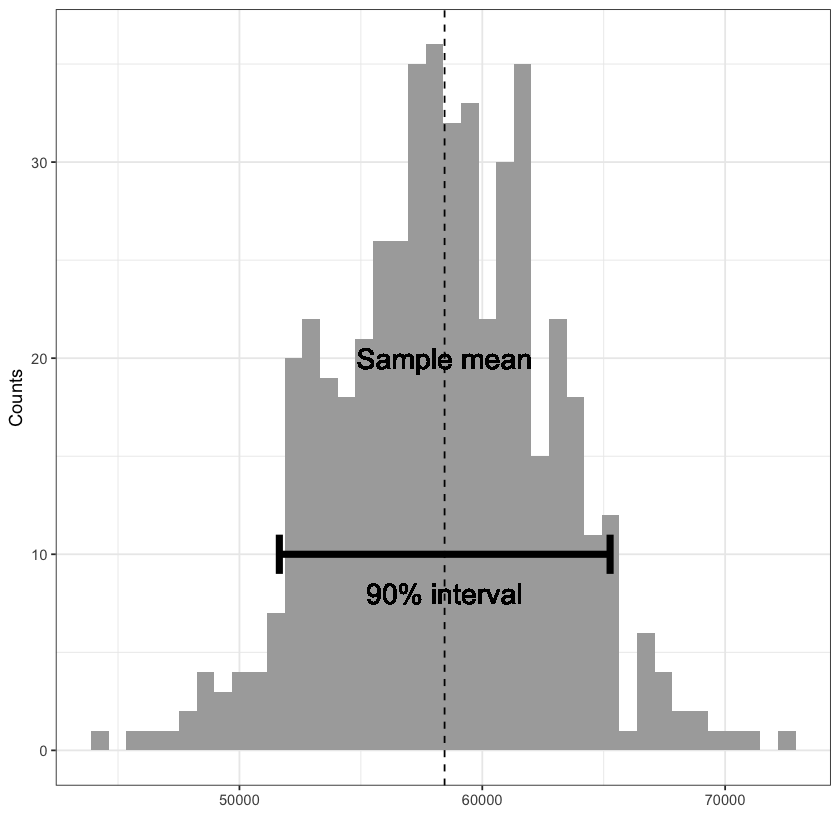

In [7]:
# R version for figure 2-9 not available
set.seed(5)
set.seed(7)
sample20 <- sample(loans_income, 20)
sampleMean <- mean(sample20)

stat_fun <- function(x, idx) mean(x[idx])
boot_obj <- boot(sample20, R=500, statistic=stat_fun)
boot_ci <- boot.ci(boot_obj, conf=0.9, type='basic')
X <- data.frame(mean=boot_obj$t)
ci90 <- boot_ci$basic[4:5]
ci <- data.frame(ci=ci90, y=c(9, 11))
# ci <- boot_ci$basic[4:5]
ci
ggplot(X, aes(x=mean)) +
    geom_histogram(bins=40, fill='#AAAAAA') +
    geom_vline(xintercept=sampleMean, linetype=2) +
    geom_path(aes(x=ci, y=10), data=ci, size=2) +
    geom_path(aes(x=ci90[1], y=y), data=ci, size=2) +
    geom_path(aes(x=ci90[2], y=y), data=ci, size=2) +
    geom_text(aes(x=sampleMean, y=20, label='Sample mean'), size=6) +
    geom_text(aes(x=sampleMean, y=8, label='90% interval'), size=6) +
    theme_bw() + 
    labs(x='', y='Counts')

# Normal Distribution
## Standard Normal and QQ-Plots

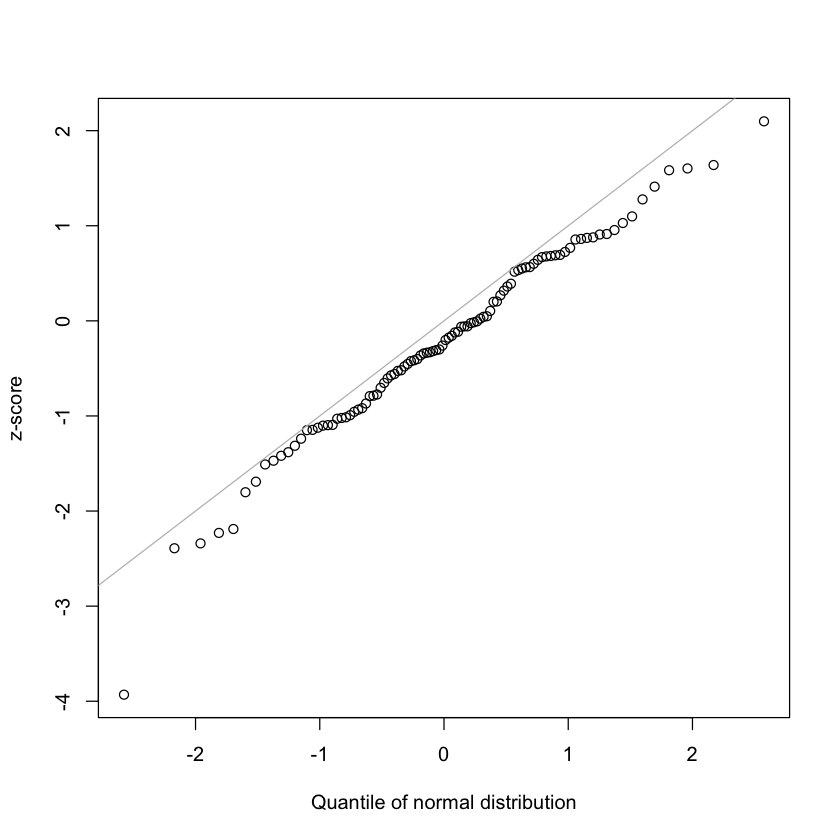

In [8]:
norm_samp <- rnorm(100)
qqnorm(norm_samp, main='', xlab='Quantile of normal distribution', ylab='z-score')
abline(a=0, b=1, col='grey')

# Long-Tailed Distributions

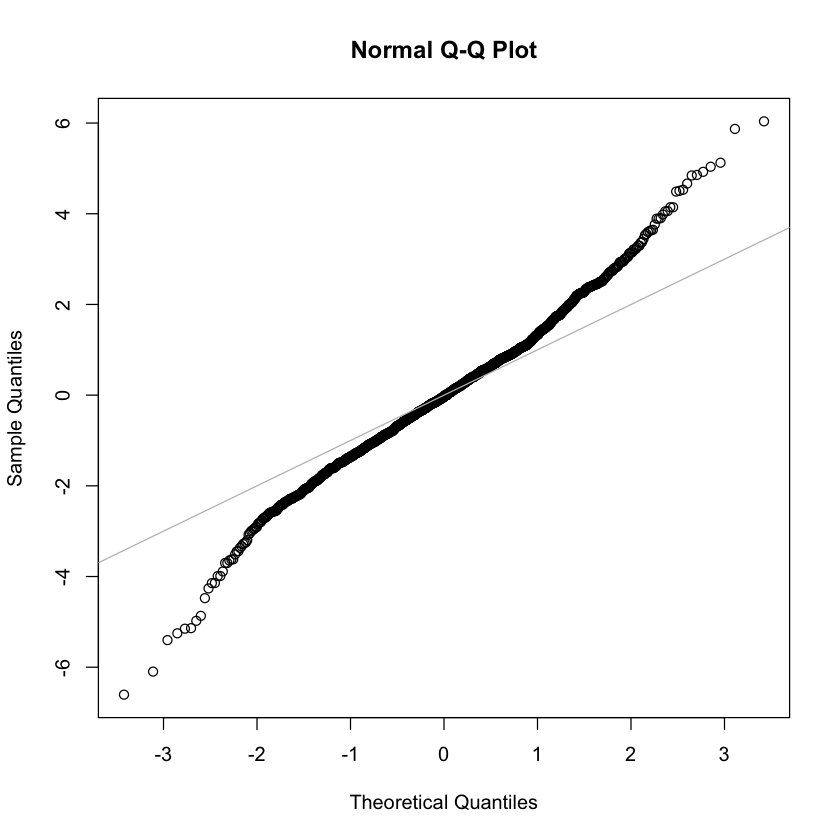

In [9]:
nflx <- sp500_px[,'NFLX']
nflx <- diff(log(nflx[nflx>0]))
qqnorm(nflx)
abline(a=0, b=1, col='grey')

# Binomial Distribution

In [10]:
dbinom(x=2, size=5, p=0.1)

[1] 0.0729

In [11]:
pbinom(2, 5, 0.1)

[1] 0.99144

In [12]:
dbinom(x=0, size=200, p=0.02)

[1] 0.01758795

# Poisson and Related Distribution
## Poisson Distributions

In [13]:
rpois(100, lambda=2)

[1] 1 2 1 3 2 2 2 5 4 1 2 3 2 6 1 5 6 2 3 1 1 1 1 1 3 4 3 0 2 6 5 2 4 1 0 2 0
 [38] 2 3 5 3 1 4 4 4 0 3 3 2 2 0 2 2 4 1 1 3 3 3 4 2 3 3 1 1 2 1 2 3 1 4 0 3 1
 [75] 2 0 3 2 3 0 3 1 2 2 4 0 2 1 2 3 0 1 3 2 2 1 4 0 3 6

## Exponential Distribution

In [14]:
rexp(n=100, rate=.2)

[1]  6.638705698  0.006711071 15.878587439  6.385282642  8.689187718
  [6]  0.274932847  1.060285215  6.015904303  0.093875017  6.455080602
 [11]  5.107568993  0.109575669  1.765047924  4.227557843  2.735554227
 [16]  2.997726241 10.191077841  4.240468833  5.387811716  1.497157135
 [21]  7.579095225  5.562681489  0.486764224  6.090781335  6.687533734
 [26] 11.269287234  0.240654313  0.935246479  0.237767026  2.176883069
 [31]  4.110882086  5.987012894  3.275767015  2.445181824  2.651181775
 [36]  6.898406064 19.070931960  4.248119792  0.343186936 12.450818987
 [41]  2.647791156 10.937270921  0.721764060  2.244586736  3.630282255
 [46]  6.024240218  6.942348827  3.908220823  1.472034554  3.390782559
 [51]  2.439800855 37.597482109  4.775333837 11.167763983  8.946549366
 [56]  7.299376037 12.101185163  3.056247963  4.740315424  4.895523689
 [61]  1.628130914 24.576101832 16.337447203  7.101003165 14.902434388
 [66]  3.736279260  8.338185277  7.306550126  9.611410722  5.024689697
 [71]  0.568290169  2.569636486  2.460176537 11.749014658  3.956422438
 [76]  2.443377292  9.854501355  6.621408963  2.375374401 13.817019732
 [81]  3.085187747  1.722440703  0.445838206  3.266576538  4.105689740
 [86]  1.336297201  4.055080791  1.765905851  3.591423519  2.463207191
 [91]  0.012264115  3.268167726  0.385862768  3.178868897  0.920671530
 [96]  1.341127136  0.060327433  2.979727949  3.784386473  0.993724382

##  Weibull Distribution

In [15]:
rweibull(100, 1.5, 5000)

[1]  4499.9469  4042.5563  1073.1496  3159.0999  4974.5261  2949.6250
  [7]  2128.0114  2405.7802  1436.2068   990.8704 15948.7863  2193.5512
 [13]   431.2380  8021.5171  7176.8527  1726.1685 15432.2320  3722.5258
 [19]  2315.5834  4688.6165  5773.7101  5957.3862  4420.9181 11118.2133
 [25]  5644.0183   268.1725  3278.2946  5831.1883  1897.1073  2874.1405
 [31]  3694.6321  6936.2837 11993.7819  2089.0115 11197.4556  8322.2591
 [37]  2814.7802   814.7315 10274.4828  2555.7808  3194.2294  5561.8328
 [43]  5051.0215  2202.9072  1804.1324  2940.9301  9353.6981 10680.6408
 [49] 14120.9182  4105.9855  4906.5105  6699.0250  3972.1596  8777.2478
 [55]  4070.6581   402.4620  1870.7039  4313.7891    72.8319  8042.1638
 [61]  2897.0133  4862.7379  6869.3911  6005.3425  3371.3165  3218.0901
 [67]   998.1284   757.3426  2220.9315   275.2842  4895.8063  8644.0165
 [73]   762.5403  3827.4317  1314.1232   874.4762   564.9984  6972.1248
 [79]  4515.3303  4234.6136  7463.3809  1168.3263  2127.9401  3922.4539
 [85] 15338.5370  3636.3710  4700.7371  3738.2289  3649.2965  3075.8736
 [91]  4767.1117  7382.9251  1862.7404  1723.9324  5358.5367  3783.5527
 [97]  1631.6235  9452.3934  5725.8342  5672.2297